**ALZHEIMER DEMENTIA STAGE CLASSIFICATION**

**TASK INTRODUCTION **

This notebook aims to complete the first task shared by the data contributor. The task requests to create a model able to correctly classify the different phases of the Alzheimer Disesase, starting from their structural MRI images. The idea is to obtain an overall accuracy higher than the 89% / 90% (accuracy obtained with their model). 

To this aim, I developed a Convolutional Neural Network (CNN) and trained it on the available data. Furthemore, in order to better understand how convolutional layers work, I investigated and printed the feature maps' output created by each single layer to see where the model focus its attention in learning how to solve the task. 

This is a beginner tutorial built on the open source high-level deep learning API Keras (version 2.4.3). This allows us to easily build, train, optimize and then evaluate the majority of neural networks architectures. You can find a complete tutorials on how to use this API looking at its [documentation](http://github.com/keras-team/keras). I decided to use this deep learning library because of its easiness and immediacy, but the same work (and even better) can be done using lower level and more dynamic APIs such as Tensorflow or the Facebook Pytorch.

Before to start I would like to thank everyone who will spend time reading my work and all the other contributors who worked on different projects using these data. Furthermore, I would like to say that I am still a novice in the field and I have a lot to learn yet, so feel free to comment, give suggestions or correct if you should find any mistake!

I hope you will enjoy my work.


**ALZHEIMER DEMENTIA (BriefOverview)**

Alzheimer Dementia is a well-known neurological condition that affects millions of people worldwide. According to the 2019 annual report on AD, almost 50 million people between 50 and 80 years of age are nowadays affected by this condition and this number is intended to triplicate by 2050. Patients affected by AD suffer from a progressive atrophy in temporal lobes that led to a wide symptomatology of memory and linguistic deficits. This untreatable condition is still poorly understood and in most of the cases diagnosis is delayed and received by patients when the disease is already in its most advanced states. Therefore, considering the costs that this condition has on single individuals, their families and the whole society, the development of new methods for earlier detection is focus of great interest.

Following this perspective, the development of data and computer science made possible to use techniques such as machine and deep learning to achieve this aim. The idea behind these techniques is that we can identify patterns of similarities within data and using this knowledge to solve different tasks such as classification.


In [1]:
#%% IMPORTING MAIN LIBRARIES

import os
import glob
import numpy as np
import pandas as pd
import seaborn as sn
from PIL import Image
from collections import Counter
import matplotlib.pyplot as plt

**DATASET**

For this tutorial we'll use the data made availble here: [Kaggle Azlheimer's Dataset](http://www.kaggle.com/tourist55/alzheimers-dataset-4-class-of-images). The dataset consists of ~ 5121 bidimensional B&W images with a standard shape of (208,176) saved into 4 different folders, each containing a sample of data for each category to identify: 
- NonDemented
- VeryMildDemented
- MildDemented
- ModerateDemented

To import these data, Keras provides a strong tool: [*the ImageGenerator function*](http://keras.io/api/preprocessing/image/). Despite that, in light of the fact that some other contributors discovered that the given test set is not representative of the training set, I decided to create my own simple function in order to solv the problem and show each passage of the importing and preprocessing phases. The 'importing data'
function simply load and open (as an array) each file of each input folder, saving the result in an empty list. I decided to operate in this way in order to associate the correct labels to each list, concatenating all the lists together in a unique dataframe and then shuffeling the data to sample new train and test sets. 






In [2]:
#%% IMPORTING DATA

def importing_data(path):
    sample = []
    for filename in glob.glob(path):
        img = Image.open(filename,'r')
        IMG = np.array(img)
        sample.append(IMG)
    return sample

path1 = '/kaggle/input/alzheimers-dataset-4-class-of-images/Alzheimer_s Dataset/train/NonDemented/*.jpg' 
path2 = '/kaggle/input/alzheimers-dataset-4-class-of-images/Alzheimer_s Dataset/train/VeryMildDemented/*.jpg'
path3 = '/kaggle/input/alzheimers-dataset-4-class-of-images/Alzheimer_s Dataset/train/MildDemented/*.jpg'
path4 = '/kaggle/input/alzheimers-dataset-4-class-of-images/Alzheimer_s Dataset/train/ModerateDemented/*.jpg'

path5 = 'kaggle/input/alzheimers-dataset-4-class-of-images/Alzheimer_s Dataset/test/NonDemented/*.jpg' 
path6 = 'kaggle/input/alzheimers-dataset-4-class-of-images/Alzheimer_s Dataset/test/VeryMildDemented/*.jpg'
path7 = 'kaggle/input/alzheimers-dataset-4-class-of-images/Alzheimer_s Dataset/test/MildDemented/*.jpg'
path8 = 'kaggle/input/alzheimers-dataset-4-class-of-images/Alzheimer_s Dataset/test/ModerateDemented/*.jpg'



train_ND = importing_data(path1)
train_VMD = importing_data(path2)
train_MID = importing_data(path3)
train_MOD = importing_data(path4)

test_ND = importing_data(path5)
test_VMD = importing_data(path6)
test_MID = importing_data(path7)
test_MOD = importing_data(path8)




This is an example of the imported images for each class:

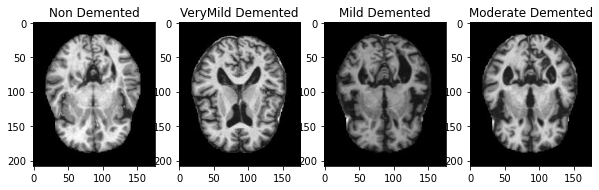

In [3]:
img1 = Image.open('//kaggle/input/alzheimers-dataset-4-class-of-images/Alzheimer_s Dataset/train/NonDemented/nonDem0.jpg')
img2 = Image.open('//kaggle/input/alzheimers-dataset-4-class-of-images/Alzheimer_s Dataset/train/VeryMildDemented/verymildDem972.jpg')
img3 = Image.open('//kaggle/input/alzheimers-dataset-4-class-of-images/Alzheimer_s Dataset/train/MildDemented/mildDem0.jpg')
img4 = Image.open('//kaggle/input/alzheimers-dataset-4-class-of-images/Alzheimer_s Dataset/train/ModerateDemented/moderateDem0.jpg')


fig, (ax1, ax2, ax3, ax4) = plt.subplots(1,4, figsize= (10,10))

ax1.imshow(img1, cmap ="binary_r")
ax1.set_title('Non Demented')
ax2.imshow(img2, cmap ="binary_r")
ax2.set_title('VeryMild Demented')
ax3.imshow(img3, cmap ="binary_r")
ax3.set_title('Mild Demented')
ax4.imshow(img4, cmap ="binary_r")
ax4.set_title('Moderate Demented')
plt.show()

In [4]:
#%% CREATION OF DATASETS

df_train_ND = pd.DataFrame({'image':train_ND, 'label': 'ND'})
df_train_VMD = pd.DataFrame({'image':train_VMD, 'label': 'VMD'})
df_train_MID = pd.DataFrame({'image':train_MID, 'label': 'MID'})
df_train_MOD = pd.DataFrame({'image':train_MOD, 'label': 'MOD'})

df_test_ND = pd.DataFrame({'image':test_ND, 'label': 'ND'})
df_test_VMD = pd.DataFrame({'image':test_VMD, 'label': 'VMD'})
df_test_MID = pd.DataFrame({'image':test_MID, 'label': 'MID'})
df_test_MOD = pd.DataFrame({'image':test_MOD, 'label': 'MOD'})

final_data = [df_train_ND, df_train_VMD, df_train_MID, df_train_MOD,df_test_ND, df_test_VMD, df_test_MID, df_test_MOD]
final_data = pd.concat(final_data)

In [5]:
#%% TRAIN LABEL SEPARATION

train_data = final_data['image']
labels = final_data['label']

A crucial step of the preprocessing phase is to control if each label (in case of supervised learning) is equally represented, namely if the dataset can be considered *balanced*. The underepresentation of one or more classes could be a potential problem for the model, leading to poor performances. In this case the daset is strongly unmbalanced, with 2560 images in the Non-Demented class,1792 images in the VeryMild-Demented class, 717 in the Mild-Demented class and just 52 images in the Moderate-Demented class. 
There are several ways to solve the problem, here, I decided to calculate the proportion of the given data and penalize the model every time that it enocunters an observation coming from the majority classes (see the code section: BALANCING THE DATA DURING TRAIN). 

In [6]:
#%% LOOKING AT THE AMOUNT OF ITEMS PER CLASS 

Counter(np.array(labels))

Counter({'ND': 2560, 'VMD': 1792, 'MID': 717, 'MOD': 52})

Considering that many machine learning algorithms tend to perform better when numerical input variables are scaled to a standard range, I decided to use the Sklearn function MinMaxScaler to transform each pixel of our images in a range of 0-1. To better understand this procedure or other normalization and scaling techiques more information are available here: [*Scale,Standardize or Normalize*](http://towardsdatascience.com/scale-standardize-or-normalize-with-scikit-learn-6ccc7d176a02)



In [7]:
#%% DATA NORMALIZATION

from sklearn.preprocessing import MinMaxScaler

def normalization(array):
    
    train_norm = []
    transformer = MinMaxScaler()
    
    for value in array:
        value = transformer.fit_transform(value)
        train_norm.append(value)
    
    return train_norm

train_norm = normalization(train_data)

Furthermore, we are working with categorical data. A good trick to make the work easier for the model is to convert our labels into arrays of 0s and 1s. This process, known as One-Hot encoding helps the model to understant the type of data it is working with. There are several ways to do that, in this case I used the LabelBinarizer function offered by sklearn.preprocessing module.




In [8]:
#%% ENCODING THE LABELS

from sklearn.preprocessing import LabelBinarizer

onehot = LabelBinarizer()
labels = onehot.fit_transform(labels)
print(labels)

[[0 0 1 0]
 [0 0 1 0]
 [0 0 1 0]
 ...
 [0 1 0 0]
 [0 1 0 0]
 [0 1 0 0]]


The train-test separation is an important step of each project. Here it is important to understand the correct amount of data to use as test set (a standard rule is to use the 20% of the data as test set). Nevertheless, this decision need to be made considering the whole amount of data available. A second important concept is that we should always try to maintain a correct/similar proportion of categories in each set. The stratify argument of the train_test_split function plays this role using the labels as reference to understand the proportions to maintain. A random state instead is arbitrarily selected to be sure to always sample the same observations, crucial step for replication. In this case the selected number (42) is selected because it is the answer to the ultimate question of Life, the Universe, and Everything (*The Hitchhiker's Guide to the Galaxy by Douglas Adams*)


In [9]:
#%% TRAIN & TEST SPLIT

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(train_norm, labels,
                                                  test_size = 0.2,
                                                  stratify = labels,
                                                  shuffle = True,
                                                  random_state = 42)

In [10]:
print('length X_train:', len(X_train))
print('length X_test:',  len(X_test))
print('length y_train:', len(y_train))
print('length y_test:', len(y_test))

length X_train: 4096
length X_test: 1025
length y_train: 4096
length y_test: 1025


In [11]:
X_train = np.array(X_train).reshape(4096,208,176,1)
X_test = np.array(X_test).reshape(1025,208,176,1)

In [12]:
#%% BALANCING THE DATA DURING TRAIN

from sklearn.utils import compute_class_weight

y_integers = np.argmax(y_train, axis=1)
class_weights = compute_class_weight('balanced', np.unique(y_integers), y_integers)
d_class_weights = dict(enumerate(class_weights))
print(d_class_weights)

{0: 1.787085514834206, 1: 24.38095238095238, 2: 0.5, 3: 0.7145847871598046}


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass classes=[0 1 2 3], y=[2 2 2 ... 3 3 2] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


In [13]:
#%% IMPORTING DEEP LEARNING LIBRARIES

from keras.models import Sequential
from keras.layers import Dense, BatchNormalization, Dropout, Conv2D , MaxPooling2D, Flatten
from keras.callbacks import EarlyStopping,ModelCheckpoint
from keras.optimizers import RMSprop

Considering the small amount of data, no GPU accelerators were used in this notebook.

**DESCRIPTION OF THE MODEL**

The Sequential structure of the model is composed by several different layers:

- An initial input layer
- Some hidden layers
- Final output layer

The presence of a few hidden layers allows us to define our convolutional structure as a Deep Neural Network (DNN). A more detailed description comprehending the nature, the name, the shape and the number of trainable parameters is shown below in the summary. In order to improve the performance I used padding and strides for feature maps optimization. 

In [14]:
#%% CREATING THE CNN MODEL 

from keras.metrics import AUC
from keras.models import Sequential
from keras.layers import Dense, BatchNormalization, Dropout, Conv2D , MaxPooling2D, Flatten
from keras.callbacks import EarlyStopping,ModelCheckpoint
from keras.optimizers import RMSprop

def build_model():
    
    '''Sequential Model creation'''
    Cnn = Sequential()
    
    Cnn.add(Conv2D(64,(5,5), activation = 'relu', padding = 'same',
                   strides=(2,2), input_shape = [208,176,1]))
    Cnn.add(MaxPooling2D(2))
    Cnn.add(Conv2D(128,(5,5), activation = 'relu', padding = 'same', strides=(2,2)))
    Cnn.add(Conv2D(128,(5,5), activation = 'relu', padding = 'same', strides=(2,2)))
    Cnn.add(Conv2D(256,(5,5), activation = 'relu', padding = 'same', strides=(2,2)))
    Cnn.add(MaxPooling2D(2))
    Cnn.add(Flatten())
    Cnn.add(Dense(64, activation = 'relu'))
    Cnn.add(Dropout(0.4))
    Cnn.add(Dense(32, activation = 'relu'))
    Cnn.add(Dropout(0.4))
    Cnn.add(Dense(4, activation = 'softmax'))
    
    return Cnn

keras_model = build_model()
keras_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 104, 88, 64)       1664      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 52, 44, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 26, 22, 128)       204928    
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 13, 11, 128)       409728    
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 6, 256)         819456    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 3, 3, 256)         0         
_________________________________________________________________
flatten (Flatten)            (None, 2304)              0

Now it's time to fit our model!

- METRIC DECISION

To do that we need to decide which parameters would be the most appropriate to help the model to achieve the best performance. The first step is to decide the metric that will be used to evaluate the model. The task afore mentioned asks to overcome an accuracy of ~ 90%. Despite that, considering the strongly imbalanced dataset, overall accuracy does not seem the best metric to use for this task. This is why I decided to keep it but also to add the area under the ROC curve (AUC) as a second metric. AUC provides an aggregate measure of performance across all possible classification thresholds. One way of interpreting AUC is as the probability that the model ranks a random positive example more highly than a random negative example.


- HYPERPARAMETERS

The first hyperparameter to control is the learning rate. Selecting a wrong value of learning rate could strongly affect the model performances, leaving it stuck in a local minima or in a plateau if the value is too low, or just jumping on the other side of the global minima if the value is too high. This is why it is so important to try different value of learning rate. Here I used 1e-4.

Due to the fact that we are working with categorical variables, the model is compiled using 'categorical crossentropy' as loss function. I then randomly selected the optimizer (RMSprop) and the activation functions of the layers (Relu).

- CALLBACKS

Callbacks are used in order to optimize the time of the training. In particular the early stopping. This method allows to optimize the model monitorizing the progress toward the converging point, stopping the training when the pick is reached even if the number of epochs selectes is not completed.

- CROSS VALIDATION

To have more reliable results, I decided to use a 3fold cross validation process. The cross validation process allows us to train the model k times, each time resampling the validation set. In this way we can see if the model performances are close to each other and it makes our results more robusts.
  

In [15]:
#%% FITTING THE MODEL

def Model_fit(name):
    
    keras_model = None
    
    keras_model = build_model()
    
    '''Compiling the model'''
    
    keras_model.compile(optimizer = RMSprop(learning_rate = 1e-4),
                        loss='categorical_crossentropy',
                        metrics =['acc', 'AUC'])
    
    es = EarlyStopping(monitor='val_loss', mode='min', patience=10 ,
                   restore_best_weights=True, verbose=1)
    
    checkpoint_cb = ModelCheckpoint("AD_Stages_model.h5", save_best_only=True)
    
    history = keras_model.fit(X_train, y_train, validation_split = 0.1,
                    epochs= 100, batch_size = 10, class_weight = d_class_weights ,
                    callbacks=[es, checkpoint_cb])
    
    keras_model.save('AD_Stages_model'+str(name)+'.h5') 
    
    return history


In [16]:
#%% MANUAL CROSS VALIDATION

def CrossVal(n_fold):
    
    cv_results = []
    for i in range(n_fold):
        print("Training on Fold: ",i+1)
        cv_results.append(Model_fit(i))
    return cv_results
        
 
cv_results = CrossVal(3)

fold1 = cv_results[0]
fold2 = cv_results[1] 
fold3 = cv_results[2]

Training on Fold:  1
Epoch 1/100
369/369 [==============================] - 84s 227ms/step - loss: 1.4476 - acc: 0.3155 - auc: 0.6335 - val_loss: 1.2179 - val_acc: 0.5024 - val_auc: 0.6988
Epoch 2/100
369/369 [==============================] - 84s 228ms/step - loss: 1.4728 - acc: 0.3478 - auc: 0.6587 - val_loss: 1.2901 - val_acc: 0.5024 - val_auc: 0.7050
Epoch 3/100
369/369 [==============================] - 86s 232ms/step - loss: 1.4526 - acc: 0.3513 - auc: 0.6729 - val_loss: 1.2814 - val_acc: 0.4927 - val_auc: 0.8060
Epoch 4/100
369/369 [==============================] - 83s 225ms/step - loss: 1.4527 - acc: 0.3736 - auc: 0.6889 - val_loss: 1.3272 - val_acc: 0.4122 - val_auc: 0.6524
Epoch 5/100
369/369 [==============================] - 83s 224ms/step - loss: 1.4488 - acc: 0.3397 - auc: 0.6684 - val_loss: 1.1825 - val_acc: 0.5024 - val_auc: 0.8081
Epoch 6/100
369/369 [==============================] - 82s 223ms/step - loss: 1.4171 - acc: 0.3926 - auc: 0.7008 - val_loss: 1.3132 - val_a

369/369 [==============================] - 84s 228ms/step - loss: 1.3495 - acc: 0.4658 - auc: 0.7570 - val_loss: 1.0945 - val_acc: 0.5073 - val_auc: 0.7959
Epoch 7/100
369/369 [==============================] - 85s 229ms/step - loss: 1.2751 - acc: 0.5014 - auc: 0.7886 - val_loss: 1.0063 - val_acc: 0.5073 - val_auc: 0.8221
Epoch 8/100
369/369 [==============================] - 84s 227ms/step - loss: 1.1957 - acc: 0.5119 - auc: 0.8047 - val_loss: 1.0192 - val_acc: 0.5341 - val_auc: 0.8323
Epoch 9/100
369/369 [==============================] - 84s 228ms/step - loss: 1.1093 - acc: 0.5312 - auc: 0.8211 - val_loss: 0.9900 - val_acc: 0.5244 - val_auc: 0.8348
Epoch 10/100
369/369 [==============================] - 86s 233ms/step - loss: 1.0401 - acc: 0.5792 - auc: 0.8495 - val_loss: 0.8179 - val_acc: 0.6317 - val_auc: 0.8799
Epoch 11/100
369/369 [==============================] - 86s 233ms/step - loss: 0.9386 - acc: 0.6191 - auc: 0.8754 - val_loss: 0.8483 - val_acc: 0.6049 - val_auc: 0.8655
Ep

369/369 [==============================] - 83s 224ms/step - loss: 1.3115 - acc: 0.4533 - auc: 0.7659 - val_loss: 1.0209 - val_acc: 0.5390 - val_auc: 0.8309
Epoch 9/100
369/369 [==============================] - 83s 225ms/step - loss: 1.2187 - acc: 0.4647 - auc: 0.7740 - val_loss: 1.1423 - val_acc: 0.4000 - val_auc: 0.7356
Epoch 10/100
369/369 [==============================] - 84s 228ms/step - loss: 1.1134 - acc: 0.4872 - auc: 0.7922 - val_loss: 0.9243 - val_acc: 0.5512 - val_auc: 0.8383
Epoch 11/100
369/369 [==============================] - 83s 225ms/step - loss: 1.0367 - acc: 0.5022 - auc: 0.8008 - val_loss: 0.9345 - val_acc: 0.5341 - val_auc: 0.8310
Epoch 12/100
369/369 [==============================] - 82s 223ms/step - loss: 0.9306 - acc: 0.5274 - auc: 0.8196 - val_loss: 0.9177 - val_acc: 0.5220 - val_auc: 0.8242
Epoch 13/100
369/369 [==============================] - 83s 225ms/step - loss: 0.8550 - acc: 0.5312 - auc: 0.8264 - val_loss: 0.7642 - val_acc: 0.6000 - val_auc: 0.8782


In [17]:
#%% CHEKING THE CROSS VALIDATION METRICS

print('Val_Acc Folder 1: ', max(fold1.history['val_acc']))
print('Val_Acc Folder 2: ', max(fold2.history['val_acc']))
print('Val_Acc Folder 3: ', max(fold3.history['val_acc']))
print('--------------------------------')
print('Val_Auc Folder 1: ', max(fold1.history['val_auc']))
print('Val_Auc Folder 2: ', max(fold2.history['val_auc']))
print('Val_Auc Folder 3: ', max(fold3.history['val_auc']))

Val_Acc Folder 1:  0.9756097793579102
Val_Acc Folder 2:  0.9756097793579102
Val_Acc Folder 3:  0.9731707572937012
--------------------------------
Val_Auc Folder 1:  0.9974014163017273
Val_Auc Folder 2:  0.9981003999710083
Val_Auc Folder 3:  0.9978495240211487


**GOOD!** Our model seems to achieved the best result of 98% accuracy on the validation in each folder of cross validation. This means that, at leat on paper (we still need to test it), the model works well overall. Furthermore, also the AUC score is high, and this make our results even stronger. An even better metric to use in this case would be the F1Score, namely the probability of type two errors occurrance.

Usually this is the moment where, looking at our results on the validation set, we can tune our hyperparameters to further improve the model performance. Despite the importance of this step,considering the results obtained, the hyperparametes optimization would be a waste of time.

After the training we can create a visual representation of the model's performace focusing our attention on the train/val accuracy trend and the train/val loss.  

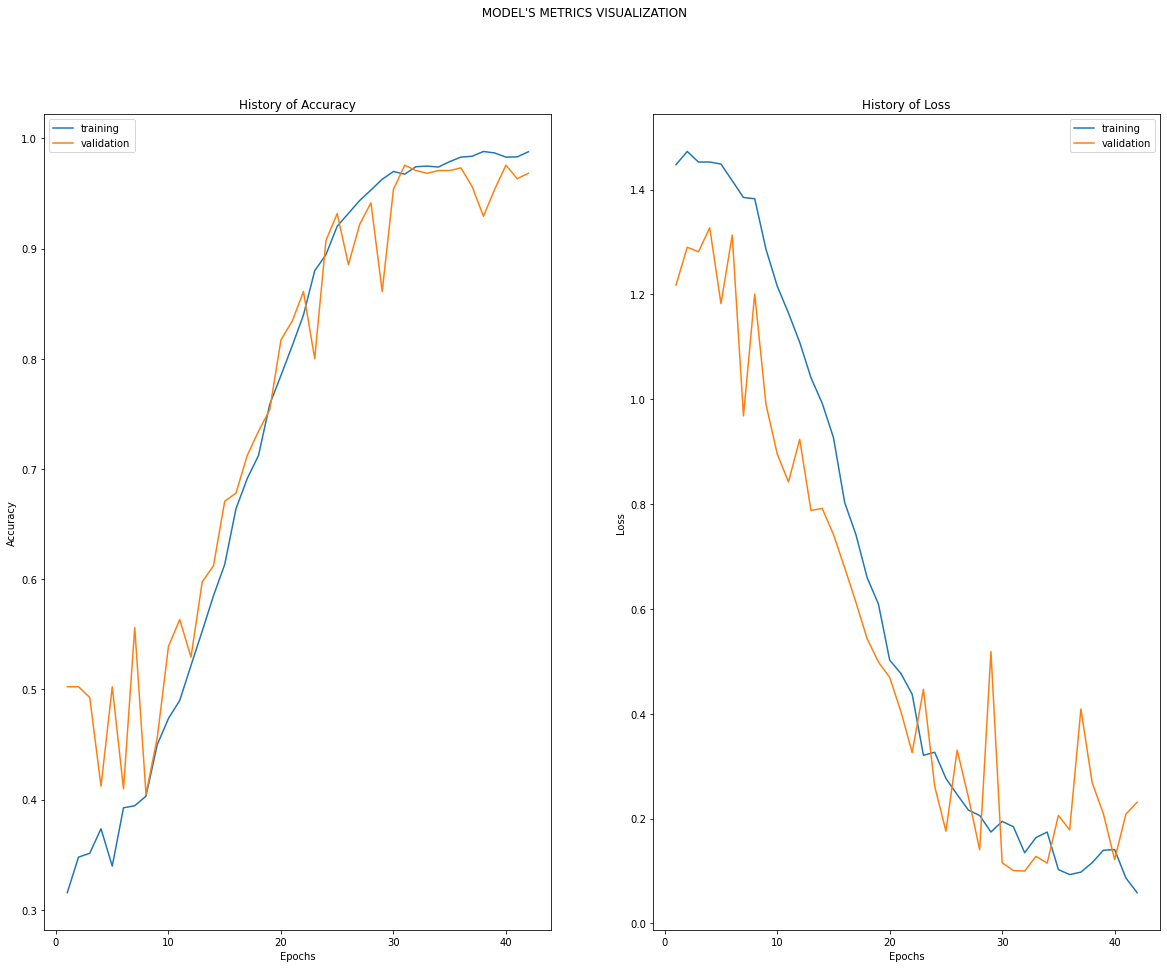

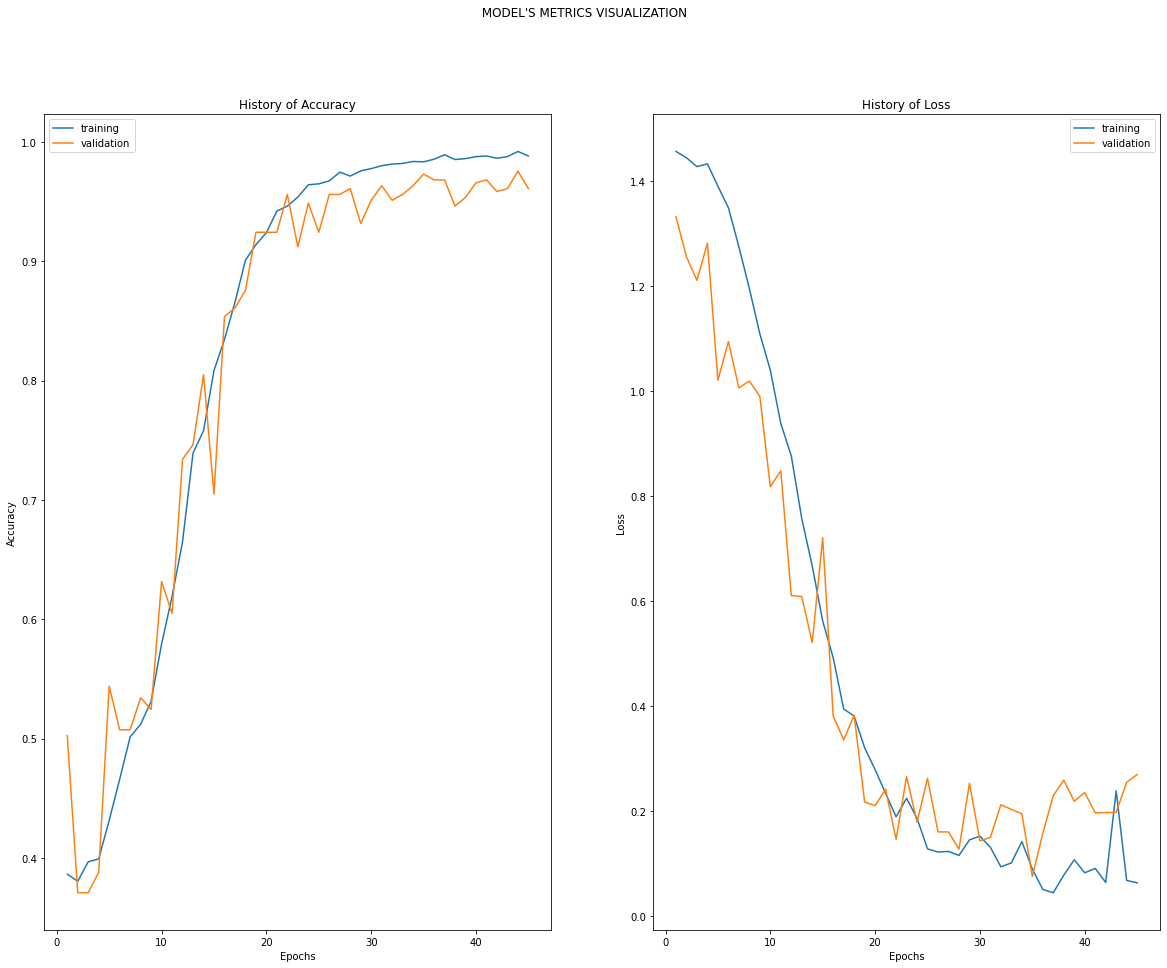

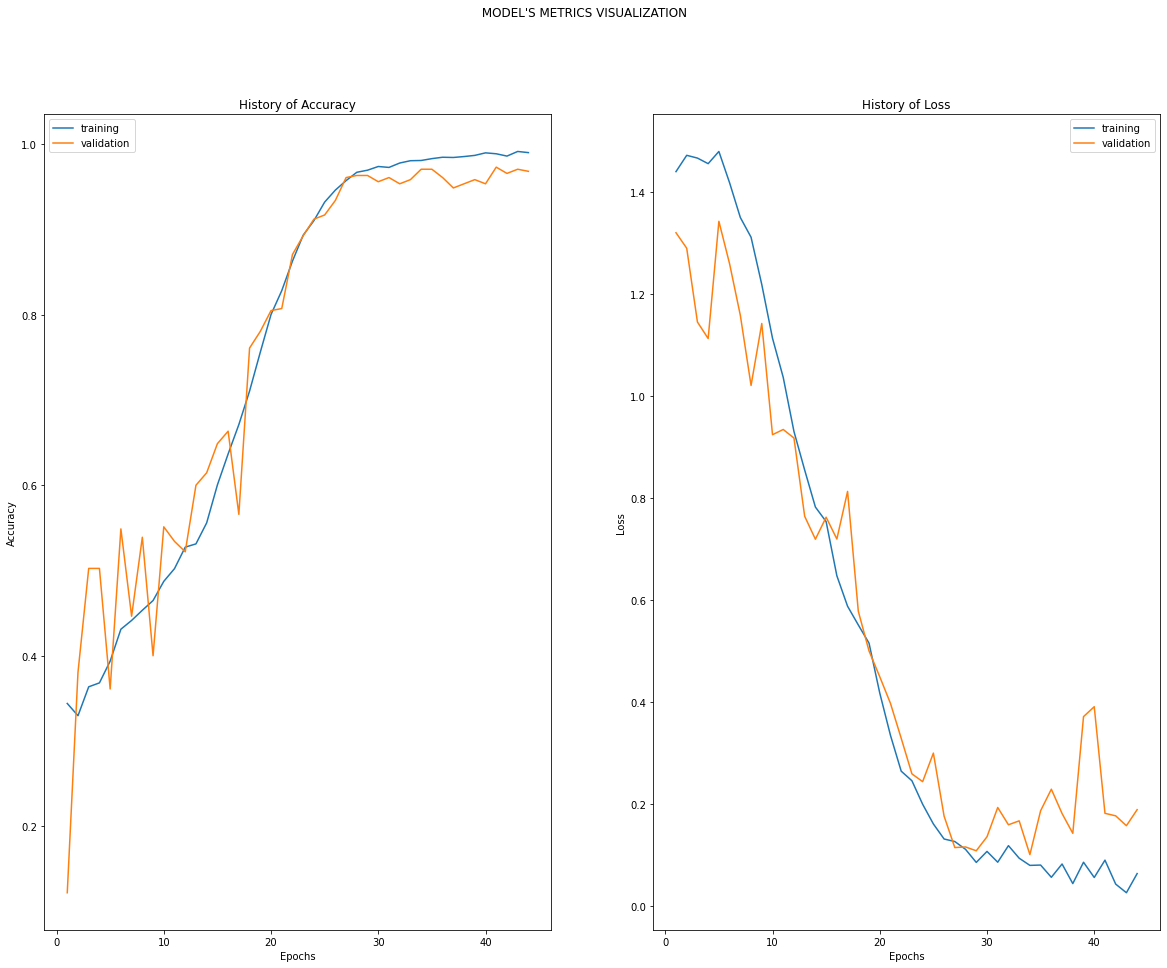

In [18]:
#%% PLOTTING RESULTS (Train vs Validation FOLDER 1)

def Train_Val_Plot(acc,val_acc,loss,val_loss):
    
    fig, (ax1, ax2) = plt.subplots(1,2, figsize= (20,15))
    fig.suptitle(" MODEL'S METRICS VISUALIZATION ")

    ax1.plot(range(1, len(acc) + 1), acc)
    ax1.plot(range(1, len(val_acc) + 1), val_acc)
    ax1.set_title('History of Accuracy')
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('Accuracy')
    ax1.legend(['training', 'validation'])


    ax2.plot(range(1, len(loss) + 1), loss)
    ax2.plot(range(1, len(val_loss) + 1), val_loss)
    ax2.set_title('History of Loss')
    ax2.set_xlabel('Epochs')
    ax2.set_ylabel('Loss')
    ax2.legend(['training', 'validation'])
    plt.show()
    

Train_Val_Plot(fold1.history['acc'],fold1.history['val_acc'],
               fold1.history['loss'],fold1.history['val_loss'])

Train_Val_Plot(fold2.history['acc'],fold2.history['val_acc'],
               fold2.history['loss'],fold2.history['val_loss'])

Train_Val_Plot(fold3.history['acc'],fold3.history['val_acc'],
               fold3.history['loss'],fold3.history['val_loss'])

Once that we are satisfied with the performance of our model, we can see how it performs on new data. WE just need to select the best model and use it to predict on the test set previously created.

In [19]:
#%% LOADING THE MODEL
import keras
keras_model = keras.models.load_model('AD_Stages_model.h5')
keras_model.compile(optimizer = RMSprop(learning_rate = 1e-4),
                    loss='categorical_crossentropy', metrics =[ 'acc'])

In [20]:
#%% PREDICTION 

# Prediction on test_set

pred_test = keras_model.predict(X_test, verbose = 1)
pred_test = onehot.inverse_transform(pred_test)
real_val = onehot.inverse_transform(y_test)
pred_test_prb= keras_model.predict_proba(X_test)

33/33 [==============================] - 6s 176ms/step


The plotting of ROC and PRECISION-RECALL curve is a further tool to see how our model is performing in the classification task. The first plot represents a graph showing the perfomance at all classification thresholds usingtwo parameters: *True Positive Rate* and *False Positive Rate*. On the other side, as said in Sklearn documentation, the precision-recall curve shows the tradeoff between precision and recall for different threshold. A high area under the curve represents both high recall and high precision, where high precision relates to a low false positive rate, and high recall relates to a low false negative rate. A furher advantage of the precision-recall curve is that, differently from the ROC curve, considers the class imbalance.

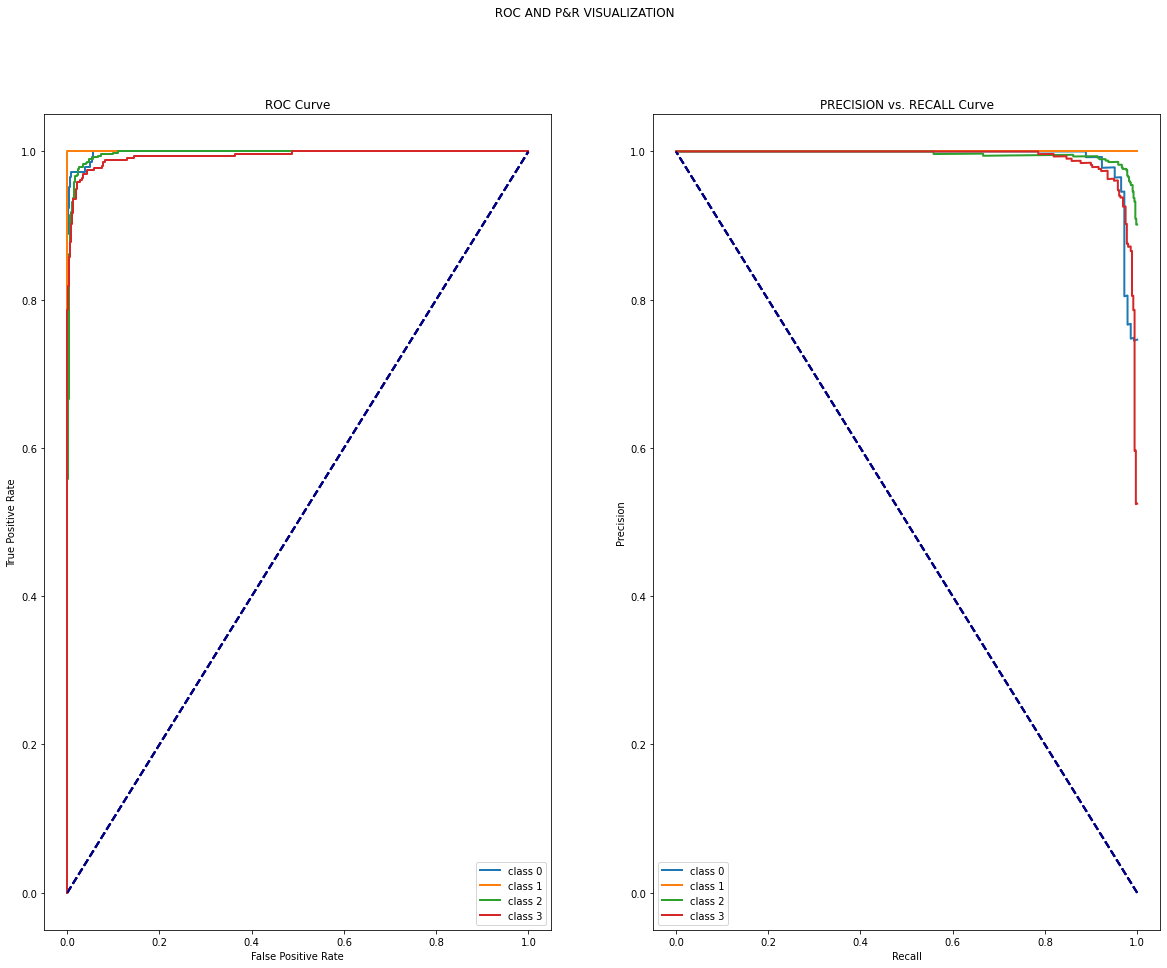

In [21]:
#%% PLOTTING THE ROC & PRECISION-RECALL CURVES

from sklearn.metrics import roc_auc_score, auc, roc_curve, precision_recall_curve

fig, (ax1, ax2) = plt.subplots(1,2, figsize= (20,15))
fig.suptitle(" ROC AND P&R VISUALIZATION ")

# ROC Curve

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(4):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i],pred_test_prb[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    ax1.plot(fpr[i], tpr[i], lw=2, label='class {}'.format(i))
    ax1.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

ax1.set_title("ROC Curve")
ax1.set_xlabel("False Positive Rate")
ax1.set_ylabel("True Positive Rate")
ax1.legend(loc="best")

# Precision-Recall Curve

precision = dict()
recall = dict()

for i in range(4):
    precision[i], recall[i], _ = precision_recall_curve(y_test[:, i], pred_test_prb[:, i])
    ax2.plot(recall[i], precision[i], lw=2, label='class {}'.format(i))
    ax2.plot([1, 0], [0, 1], color='navy', lw=2, linestyle='--')

ax2.set_title("PRECISION vs. RECALL Curve")
ax2.set_xlabel("Recall")
ax2.set_ylabel("Precision")
ax2.legend(loc="best")


The use of the confusion matrix is probably the most immediate way to understand the performance of the model and to check the presence of *Type 1* (False positive) and *Type 2* (False negative) errors. In this case a heatmap is built based on the values of the confusion matrix.

Counter({'ND': 512, 'VMD': 359, 'MID': 144, 'MOD': 10})
Counter({'ND': 514, 'VMD': 355, 'MID': 146, 'MOD': 10})


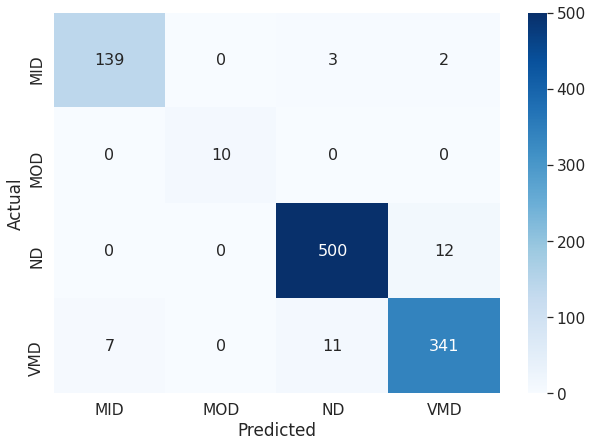

In [22]:
#%% CONFUSION MATRIX


from collections import Counter
from sklearn.metrics import confusion_matrix

print(Counter(real_val))
print(Counter(pred_test))

conf_mx = confusion_matrix(real_val, pred_test)
conf_mx

heat_cm = pd.DataFrame(conf_mx, columns=np.unique(real_val), index = np.unique(real_val))
heat_cm.index.name = 'Actual'
heat_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,7))
sn.set(font_scale=1.4) # For label size
sn.heatmap(heat_cm, cmap="Blues", annot=True, annot_kws={"size": 16},fmt='g')# font size
plt.show()

To conclude the evaluation of our work we can plot the classification report, a table that shows the main metrics (Accuracy, Precision, Recall and F1_Score) for each single class.

In [23]:
#%% LOOKING AT THE METRIC REPORT

from sklearn.metrics import classification_report

print(classification_report(real_val, pred_test))
print(roc_auc)

              precision    recall  f1-score   support

         MID       0.95      0.97      0.96       144
         MOD       1.00      1.00      1.00        10
          ND       0.97      0.98      0.97       512
         VMD       0.96      0.95      0.96       359

    accuracy                           0.97      1025
   macro avg       0.97      0.97      0.97      1025
weighted avg       0.97      0.97      0.97      1025

{0: 0.9983525665279354, 1: 1.0, 2: 0.996516355994152, 3: 0.9938894326080955}


In this part of the notebook I tried to visualize the output of the feature map after each covolutional layer. The main aim of this was to better understand what the model sees and where each feature map is made of.

In [24]:
#%% IMPORTING LIBRARIES for CNN's Feature Maps Visualizations

import keras
from matplotlib import pyplot
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from numpy import expand_dims
from keras.models import Model
from skimage import color
from skimage import io

In [25]:
# Summarizing feature map shapes

for i in range(len(keras_model.layers)):
    layer = keras_model.layers[i]
    # check for convolutional layer
    if 'conv' not in layer.name:
        continue
    # summarize output shape
    print(i, layer.name, layer.output.shape)

0 conv2d_12 (None, 104, 88, 64)
2 conv2d_13 (None, 26, 22, 128)
3 conv2d_14 (None, 13, 11, 128)
4 conv2d_15 (None, 7, 6, 256)


In [26]:
# Importing an image as example

img = color.rgb2gray(io.imread('/kaggle/input/alzheimers-dataset-4-class-of-images/Alzheimer_s Dataset/train/ModerateDemented/moderateDem0.jpg'))
img = expand_dims(img, axis=0)
img

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]], dtype=uint8)

Here below the pictures represent the output of each single convolutional layer. Looking at the differences in the images it is possible to see that these tend to be less recognizable after each convolution. This is in normal and in line with what expected, cause deep learning models capture general feature such as countours and orientations at the beginning and more complex details in the higher convolutions. To have an even better understanding on how to see what convolutional layers can learn and where they focus their attention I advise the notebook of [Neil Kloper](http://www.kaggle.com/schorsi/classification-of-alzheimers-95-totw). 

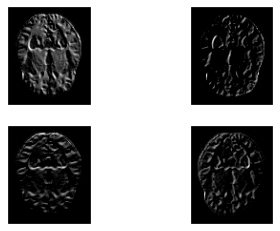

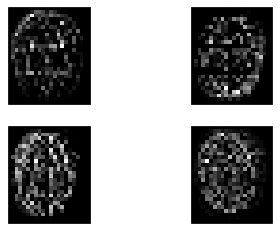

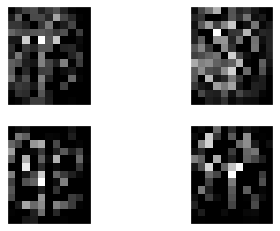

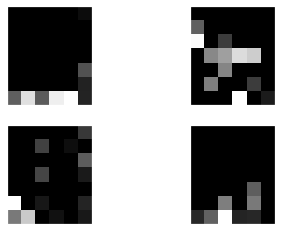

In [27]:
# Visualizing our Convolutional outputs

ixs = [0,2,3,4] # The indeces of our Convolutional Layers

outputs = [keras_model.layers[i].output for i in ixs]
model3 = Model(inputs=keras_model.inputs, outputs=outputs)
feature_maps = model3.predict(img)
square = 2
for fmap in feature_maps:
    # plot all 64 maps in an 8x8 squares
    ix = 1
    for _ in range(square):
        for _ in range(square):
            # specify subplot and turn of axis
            ax = pyplot.subplot(square, 2, ix)
            ax.set_xticks([])
            ax.set_yticks([])
            # plot filter channel in grayscale
            pyplot.imshow(fmap[0, :, :, ix-1], cmap='gray')
            ix += 1
    # show the figure
    pyplot.show()

**CONCLUSION**

To conclude it is possible to see that the model performs pretty well in recognizing all the classes with an overall accuracy of around 97%, a really good F1_score and an AUC score for each class higher than 99%. There is still margin to optimize the model but I think that this could be done by increasing the dataset rather than wasting time optimizing a model that is already efficient.

**REFERENCES:**

Books

- Hands on Machine Learnin with Scikit_learn, Keras & Tensorflow (O'Reilly, 2019)

Notebooks

- [Alzheimer MRI Model + TensorFlow 2.3 Data Loading (Amy Jang)](http://www.kaggle.com/amyjang/alzheimer-mri-model-tensorflow-2-3-data-loading)

- [Classification of Alzheimers 95% TOTW (Neil Kloper)](http://www.kaggle.com/schorsi/classification-of-alzheimers-95-totw)

- [Basic CNN Keras with cross validation (Frankle Muchahary)](http://kaggle.com/franklemuchahary/basic-cnn-keras-with-cross-validation)


